<h2 align='center'><a>Understanding the business problem</h2>

#### <a>Business Context:
The project seeks to understand the overall demand for labour in the Armenian online job market
from the 19,000 job postings from 2004 to 2015 posted on CareerCenter, an Armenian human
resource portal. Through text mining on this data, we will be able to understand the nature of the
ever-changing job market, as well as the overall demand for labour in the Armenia economy. The
data was originally scraped from a Yahoo! Mailing group.

#### <a>Business Objectives:
Our main business objectives are to understand the dynamics of the labour market of Armenia using
the online job portal post as a proxy. A secondary objective is to implement advanced text analytics
as a proof of concept to create additional features such as enhanced search function that can add
additional value to the users of the job portal.
    
#### Business questions answering to our business objectives are defined as follows:

#### Job Nature and Company Profiles: 
What are the types of jobs that are in demand in Armenia? How are the job natures changing over time?

#### Desired Characteristics and Skill-Sets:
What are the desired characteristics and skill-set of the candidates based on the job description
dataset? How these are desired characteristics changing over time?

#### IT Job Classification: Build a classifier that can tell us from the job description and company
description whether a job is IT or not, so that this column can be automatically populated for new
job postings. After doing so, understand what important factors are which drives this classification.
Similarity of Jobs: Given a job title, find the 5 top jobs that are of a similar nature, based on the job
post.

#### Text Mining Goals:
The text mining goals is a set of sub-goals to answer our business questions:
For the IT Job classification business question, you should aim to create supervised learning
classification models that are able to classify based on the job text data accurately, is it an IT job.
On the business question of Job Nature and Company Profiles. Unsupervised learning techniques,
such as topic modelling and other techniques such as term frequency counting will be applied to the
data, including time period segmented dataset. Qualitative assessment will be done on the results to
help us understand the job postings.

To understand the desired characteristics and skill-sets demanded by employers in the job ads,
unsupervised learning methods such as K-means clustering will be used after appropriate dimension
reduction.

For Job Queries business question, we propose exploring the usage of Latent Semantic Model and
Matrix Similarity methods for information retrieval. The results will be assessed qualitatively. To
return the top 5 most similar job posting, the job text data are vectorised using different models
such as word2vec, and doc2vec and similarity scores are obtained using cosine similarity scores,
ranked and returned as the answer which is then evaluated individually for relevance.

#### <a>Importing the necessary library.

In [0]:
import pandas as pd             
import numpy as np              

import seaborn as sns           

import matplotlib.pyplot as plt 
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

import nltk            
import string          
import re              

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = False

<h2 align='center'><a>Exploratory Data Analysis(EDA)</h2>

#### <a>Import the data

In [0]:
# df = pd.read_csv('D:\\Python\Advance\\Case study-Final\\6. Analyzing online Job Postings\\data job posts.csv')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data job posts.csv to data job posts.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data job posts.csv']))

#### <a>Making friendship with data after importing.

In [0]:
pd.options.display.max_columns = None ##(For viewing all the columns of a dataframe.)

In [6]:
df.head() 

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \nD...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [7]:
df.shape 

(19001, 24)

In [8]:
df.columns  

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

In [10]:
df.isnull().sum()  # Number of missing values in the dataset-

jobpost                 0
date                    0
Title                  28
Company                 7
AnnouncementCode    17793
Term                11325
Eligibility         14071
Audience            18361
StartDate            9326
Duration             8203
Location               32
JobDescription       3892
JobRequirment        2522
RequiredQual          484
Salary               9379
ApplicationP           60
OpeningDate           706
Deadline               65
Notes               16790
AboutC               6531
Attach              17442
Year                    0
Month                   0
IT                      0
dtype: int64

### <a>Visualisation

#### <a>Maximum required Job Role/Title/Designation-

In [11]:
#Top 20 Job role-
Designation=df[['Title','jobpost']].groupby('Title').count().nlargest(20,'jobpost').reset_index()
Designation

,Title,jobpost
0,Accountant,328
1,Chief Accountant,219
2,Medical Representative,216
3,Sales Manager,166
4,Administrative Assistant,155
5,Lawyer,151
6,Software Developer,134
7,Project Manager,117
8,English Language Courses,109
9,Web Developer,101


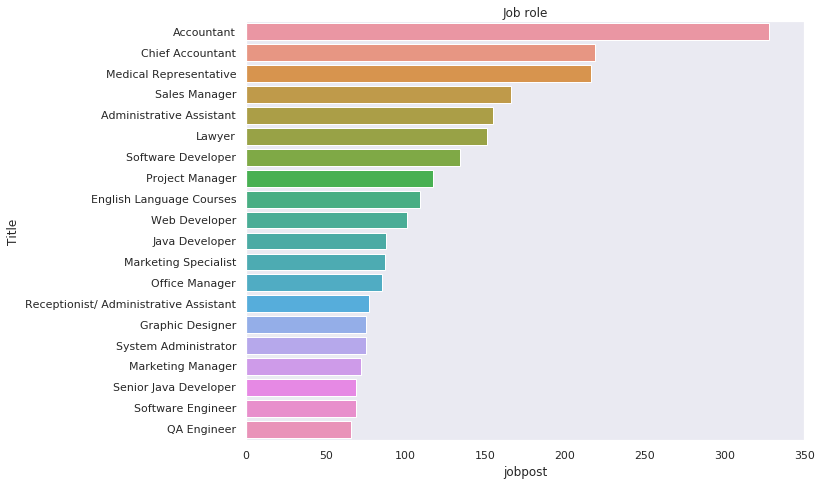

In [12]:
sns.barplot(x = 'jobpost', y = 'Title', data = Designation)
plt.title('Job role')
plt.show()

> ##### Most of the Job opening created in Accounts field.

#### <a>Company wise opening

In [13]:
#Top 20 Company created opening-
Com=df[['Company','jobpost']].groupby('Company').count().nlargest(20,'jobpost').reset_index()
Com

,Company,jobpost
0,ArmenTel CJSC,353
1,World Vision Armenia,239
2,Mentor Graphics Development Services CJSC,236
3,Career Center NGO,229
4,Orange Armenia,203
5,Ameriabank CJSC,196
6,Converse Bank CJSC,161
7,SAS Group LLC,150
8,UNDP Armenia Office,132
9,Central Bank of Armenia,126


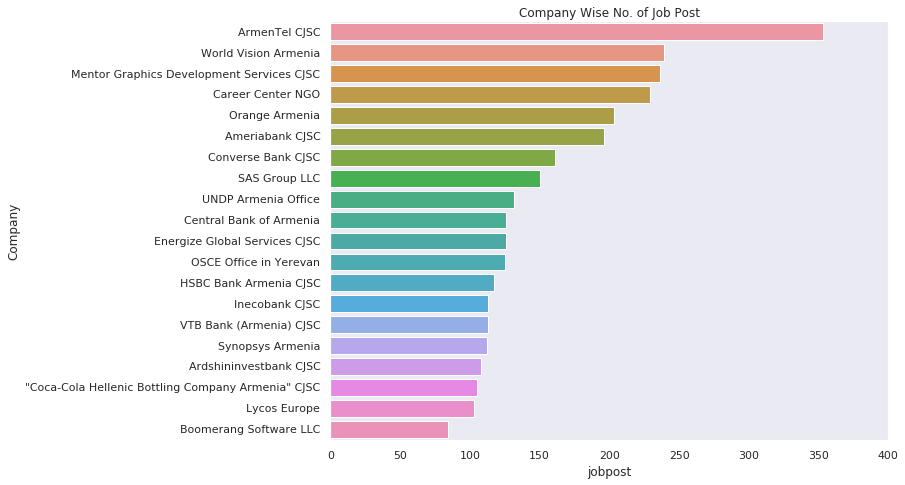

In [14]:
sns.barplot(x = 'jobpost', y = 'Company', data = Com)
plt.title('Company Wise No. of Job Post')
plt.show()

> ##### Most of the opening is from ArmenTel CJSC company.

#### <a>Location wise jobs

In [15]:
#Top 5 Company created opening-
Loc=df[['Location','jobpost']].groupby('Location').count().nlargest(5,'jobpost').reset_index()
Loc

,Location,jobpost
0,"Yerevan, Armenia",17061
1,"Gyumri, Armenia",102
2,"Abovyan, Armenia",95
3,"Tbilisi, Georgia",74
4,"Vanadzor, Armenia",72


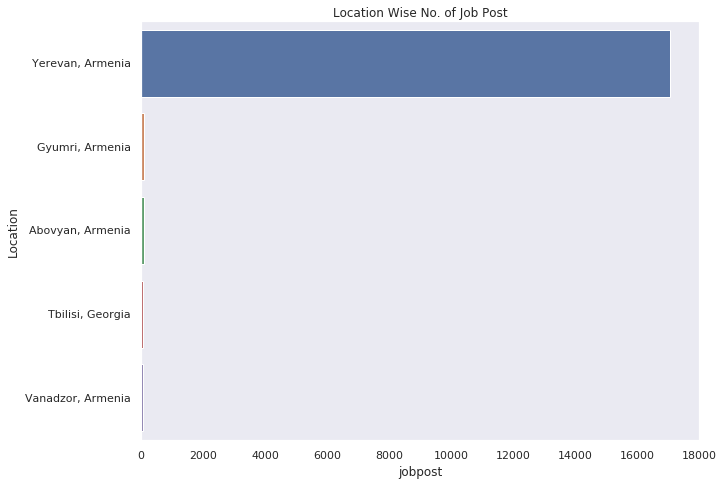

In [16]:
sns.barplot(x = 'jobpost', y = 'Location', data = Loc)
plt.title('Location Wise No. of Job Post')
plt.show()

> ##### At loaction Yerevan,Armena the maximum job opening created

#### <a> Job Posting By Year

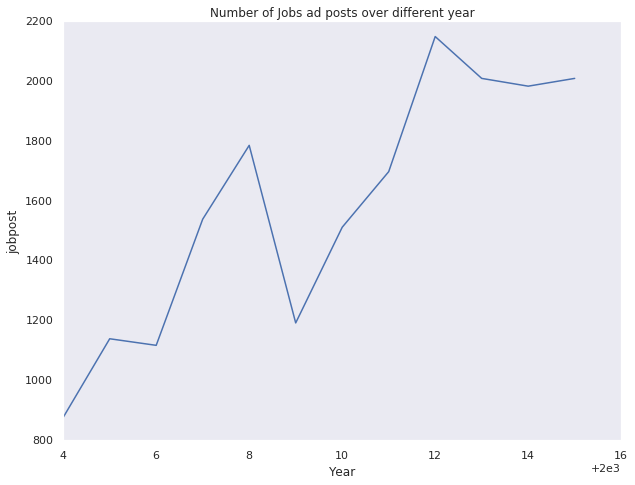

In [17]:

# Plot Number of Jobs ad posts over different year

Jobs_ad_posts = df.groupby('Year').count().reset_index()
sns.lineplot(x = 'Year', y = 'jobpost', data = Jobs_ad_posts)

plt.title('Number of Jobs ad posts over different year')
plt.show()


> ##### As there is a big fall in the year 2009, likely due to the some crisis in between 2008-2009 other than the number of job  advt postings increased.

#### <a> Job Posting By Year

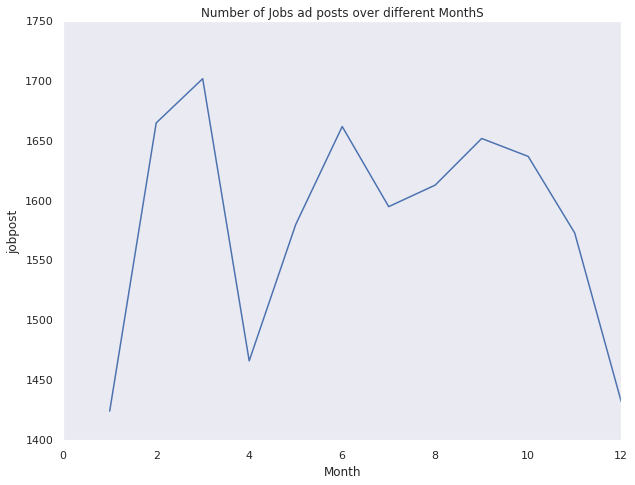

In [18]:
## Plot of all the job postings grouped at the month level

Jobs_ad_posts_2 = df.groupby('Month').count().reset_index()

sns.lineplot(x = 'Month', y = 'jobpost', data = Jobs_ad_posts_2)

plt.title('Number of Jobs ad posts over different MonthS')
plt.show()

> ##### According to monthly analysis-Job postings advt highest in the months of March and are at a lowest in December and January month.

#### <a>Job related to IT

Text(0, 0.5, 'Job related to IT')

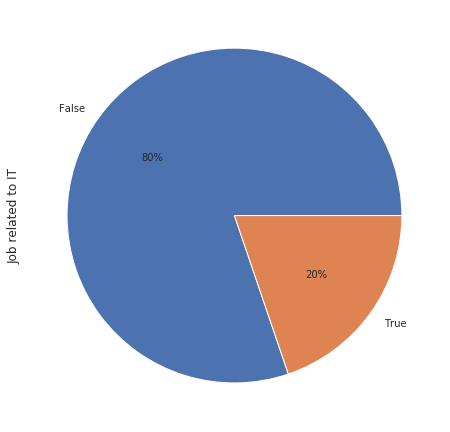

In [19]:
### Pie Chart Comparision 

df['IT'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=10, subplots='true')
plt.ylabel('Job related to IT')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa94c3d9d30>,
      dtype=object)

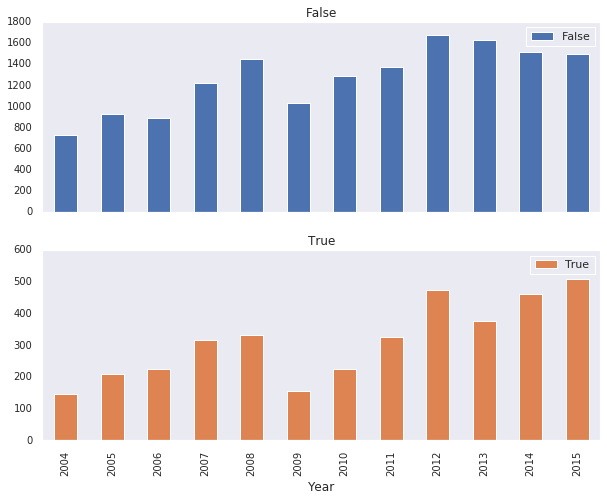

In [20]:
df[['Year','IT']].groupby('IT')['Year'].value_counts().unstack([0]).plot.bar(fontsize=10, subplots='True')

> <a>Job created in IT/Non IT sector year by year.

In [21]:
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \nD...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


#### <a>Word Cloud of the Title columns

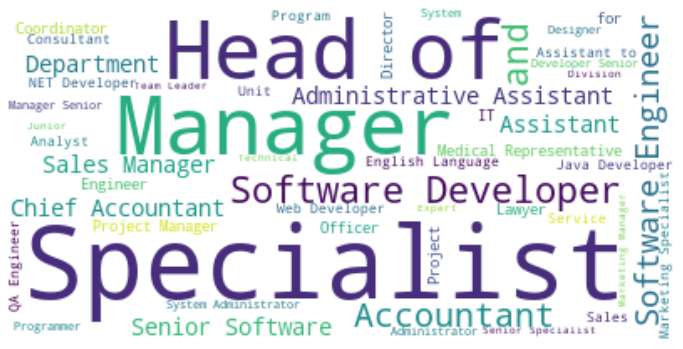

In [22]:
from wordcloud import WordCloud

T1=' '.join(df['Title'].astype('str'))

wordcloud = WordCloud(max_words=50,stopwords=[],max_font_size=60,background_color='white').generate(T1)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [23]:
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \nD...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


#### <a>Word Cloud of the RequiredQual columns

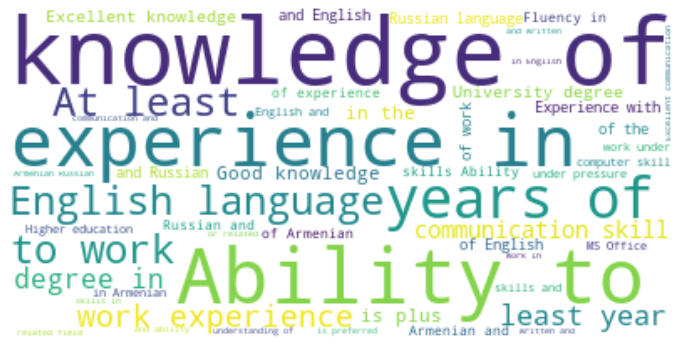

In [24]:
from wordcloud import WordCloud

T2=' '.join(df['RequiredQual'].astype('str'))

wordcloud = WordCloud(max_words=50,stopwords=[],max_font_size=60,background_color='white').generate(T2)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### <a> DATA SELECTION AND CONSTRUCTION

In [25]:
df.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [0]:
# I will select the following columns in the table for further analysis

select_col = ['jobpost', 'Title', 'Company', 'JobRequirment', 'JobDescription', 'RequiredQual', 'IT', 'Year']

df = df[select_col]

In [27]:
df.head(15)

,jobpost,Title,Company,JobRequirment,JobDescription,RequiredQual,IT,Year
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company,- Supervises financial management and administ...,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\nindividu...",False,2004
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,False,2004
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,Caucasus Environmental NGO Network (CENN),- Working with the Country Director to provide...,Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...",False,2004
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,Manoff Group,- Identify gaps in knowledge and overseeing in...,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...",False,2004
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,Yerevan Brandy Company,- Rendering technical assistance to Database M...,NaN,- University degree; economical background is ...,True,2004
5,"Boutique ""Appollo""\nJOB TITLE: Saleswoman\nPO...",Saleswoman,"Boutique ""Appollo""",NaN,Saleswoman will sell menswear and accessories.,"- Candidates should be female, 20-30 years old...",False,2004
6,OSI Assistance Foundation - Armenian Branch Of...,Chief Accountant/ Finance Assistant,OSI Assistance Foundation - Armenian Branch Of...,NaN,The Armenian Branch Office of the Open Society...,- University degree in finance/ accounting; \n...,False,2004
7,International Research & Exchanges Board (IREX...,Non-paid part or full time Programmatic Intern,International Research & Exchanges Board (IREX),NaN,NaN,NaN,False,2004
8,Yerevan Brandy Company \nJOB TITLE: Assistant...,Assistant to Managing Director,Yerevan Brandy Company,- Coordinating the work of subordinate employe...,NaN,- University degree;\n- At least 3 years of ex...,False,2004
9,American Embassy Yerevan\nANNOUNCEMENT NUMBER:...,"Program Assistant (INL), FSN-8; FP-6*",American Embassy Yerevan\nANNOUNCEMENT NUMBER:...,NaN,The incumbent assists in coordinating INL-fund...,NOTE: All applicants are instructed to\naddres...,False,2004


- <h4> <a> DATA CLEANING

In [0]:
# dropping duplicate rows from the dataset
df= df.drop_duplicates()

In [29]:
df.shape  # New shape after removal of duplicates

(18896, 8)

>105 duplicate rows were removed. 

In [0]:
# Missing values imputation with mode

df['jobpost'] = df['jobpost'].fillna(df['jobpost'].mode()[0])
df['Title'] = df['Title'].fillna(df['Title'].mode()[0])
df['Company'] = df['Title'].fillna(df['Title'].mode()[0])
df['JobRequirment'] = df['JobRequirment'].fillna(df['JobRequirment'].mode()[0])
df['JobDescription'] = df['JobDescription'].fillna(df['JobDescription'].mode()[0])
df['RequiredQual'] = df['RequiredQual'].fillna(df['RequiredQual'].mode()[0])

In [31]:
df.isna().sum()  # Number of missing values in the dataset

jobpost           0
Title             0
Company           0
JobRequirment     0
JobDescription    0
RequiredQual      0
IT                0
Year              0
dtype: int64

- <h4> <a>DATA PREPROCESSING

##### <a>  TEXT LOWERCASE

In [32]:
df.columns

Index(['jobpost', 'Title', 'Company', 'JobRequirment', 'JobDescription',
       'RequiredQual', 'IT', 'Year'],
      dtype='object')

In [0]:
### Step-1
# lowercase the text to reduce the size of the vocabulary of our text data.

def text_lowercase(text):
    return text.lower()

In [34]:
for col in ['jobpost', 'Title','Company' ,'JobRequirment', 'JobDescription', 'RequiredQual']:
    
    df[col] = df[col].apply(lambda x: text_lowercase(x))

df.head()

,jobpost,Title,Company,JobRequirment,JobDescription,RequiredQual,IT,Year
0,ameria investment consulting company\njob titl...,chief financial officer,chief financial officer,- supervises financial management and administ...,ameria investment consulting company is seekin...,"to perform this job successfully, an\nindividu...",False,2004
1,international research & exchanges board (irex...,full-time community connections intern (paid i...,full-time community connections intern (paid i...,- participate in application design;\n- provid...,the incumbent will work under the direct super...,- bachelor's degree; master's is preferred;\n-...,False,2004
2,caucasus environmental ngo network (cenn)\njob...,country coordinator,country coordinator,- working with the country director to provide...,public outreach and strengthening of a growing...,"- degree in environmentally related field, or ...",False,2004
3,manoff group\njob title: bcc specialist\nposi...,bcc specialist,bcc specialist,- identify gaps in knowledge and overseeing in...,the lead (local enhancement and development fo...,"- advanced degree in public health, social sci...",False,2004
4,yerevan brandy company\njob title: software d...,software developer,software developer,- rendering technical assistance to database m...,the incumbent will work under the direct super...,- university degree; economical background is ...,True,2004


 <H3>  <a> Remove Numbers

#### Inflect library correctly generate plurals, ordinals, indefinite articles; convert numbers to words

In [0]:
### Step-2

# import the inflect library 
import inflect                

p = inflect.engine()

def convert_number(text): 
    
    # split string into list of words 
    temp_str = text.split()
    
    # initialise empty list 
    new_string = []
    
    for word in temp_str:
        
        # if word is a digit, convert the digit to numbers and append into the new_string list
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
        
        else: 
            new_string.append(word) 
            
    # join the words of new_string to form a string
    temp_str = ' '.join(new_string)
    
    return temp_str 

In [36]:
for col in ['jobpost', 'Title','Company' ,'JobRequirment', 'JobDescription', 'RequiredQual']:
    
    df[col] = df[col].apply(lambda x: convert_number(x))

df.head()

,jobpost,Title,Company,JobRequirment,JobDescription,RequiredQual,IT,Year
0,ameria investment consulting company job title...,chief financial officer,chief financial officer,- supervises financial management and administ...,ameria investment consulting company is seekin...,"to perform this job successfully, an individua...",False,2004
1,international research & exchanges board (irex...,full-time community connections intern (paid i...,full-time community connections intern (paid i...,- participate in application design; - provide...,the incumbent will work under the direct super...,- bachelor's degree; master's is preferred; - ...,False,2004
2,caucasus environmental ngo network (cenn) job ...,country coordinator,country coordinator,- working with the country director to provide...,public outreach and strengthening of a growing...,"- degree in environmentally related field, or ...",False,2004
3,manoff group job title: bcc specialist positio...,bcc specialist,bcc specialist,- identify gaps in knowledge and overseeing in...,the lead (local enhancement and development fo...,"- advanced degree in public health, social sci...",False,2004
4,yerevan brandy company job title: software dev...,software developer,software developer,- rendering technical assistance to database m...,the incumbent will work under the direct super...,- university degree; economical background is ...,True,2004


#### <a> REMOVE PUNCTUATION

In [0]:
### Step-3

# remove punctuation 
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [38]:
for col in ['jobpost', 'Title','Company' ,'JobRequirment', 'JobDescription', 'RequiredQual']:
    
    df[col] = df[col].apply(lambda x: remove_punctuation(x))

df.head()

,jobpost,Title,Company,JobRequirment,JobDescription,RequiredQual,IT,Year
0,ameria investment consulting company job title...,chief financial officer,chief financial officer,supervises financial management and administr...,ameria investment consulting company is seekin...,to perform this job successfully an individual...,False,2004
1,international research exchanges board irex t...,fulltime community connections intern paid int...,fulltime community connections intern paid int...,participate in application design provide ne...,the incumbent will work under the direct super...,bachelors degree masters is preferred excell...,False,2004
2,caucasus environmental ngo network cenn job ti...,country coordinator,country coordinator,working with the country director to provide ...,public outreach and strengthening of a growing...,degree in environmentally related field or fi...,False,2004
3,manoff group job title bcc specialist position...,bcc specialist,bcc specialist,identify gaps in knowledge and overseeing inf...,the lead local enhancement and development for...,advanced degree in public health social scien...,False,2004
4,yerevan brandy company job title software deve...,software developer,software developer,rendering technical assistance to database ma...,the incumbent will work under the direct super...,university degree economical background is a ...,True,2004


#### <a> REMOVE WHITESPACES

>Using the join and split function to remove all the white spaces in a string.

In [0]:
### Step-4 Removing extra spaces-

def remove_whitespace(text): 
    return  " ".join(text.split())

In [40]:
for col in ['jobpost', 'Title','Company' ,'JobRequirment', 'JobDescription', 'RequiredQual']:
    
    df[col] = df[col].apply(lambda x: remove_whitespace(x))

df.head()

,jobpost,Title,Company,JobRequirment,JobDescription,RequiredQual,IT,Year
0,ameria investment consulting company job title...,chief financial officer,chief financial officer,supervises financial management and administra...,ameria investment consulting company is seekin...,to perform this job successfully an individual...,False,2004
1,international research exchanges board irex ti...,fulltime community connections intern paid int...,fulltime community connections intern paid int...,participate in application design provide nece...,the incumbent will work under the direct super...,bachelors degree masters is preferred excellen...,False,2004
2,caucasus environmental ngo network cenn job ti...,country coordinator,country coordinator,working with the country director to provide e...,public outreach and strengthening of a growing...,degree in environmentally related field or fiv...,False,2004
3,manoff group job title bcc specialist position...,bcc specialist,bcc specialist,identify gaps in knowledge and overseeing info...,the lead local enhancement and development for...,advanced degree in public health social scienc...,False,2004
4,yerevan brandy company job title software deve...,software developer,software developer,rendering technical assistance to database man...,the incumbent will work under the direct super...,university degree economical background is a p...,True,2004


#### <a> REMOVE DEFAULT STOPWORDS

> The NLTK library has a set of stopwords and we can use these to remove stopwords from our text and return a list of word tokens.

Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization) techniques in the field 
of Natural Language Processing that are used to prepare text, words, and documents for further processing.

In [41]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
### Step-5

# remove stopwords function
# ( stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore,
# both when indexing entries for searching and when retrieving them as the result of a search query.)


def remove_stopwords(text): 
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

In [43]:
for col in ['jobpost', 'Title','Company' ,'JobRequirment', 'JobDescription', 'RequiredQual']:
    
    df[col] = df[col].apply(lambda x: remove_stopwords(x))

df.head()

,jobpost,Title,Company,JobRequirment,JobDescription,RequiredQual,IT,Year
0,"[ameria, investment, consulting, company, job,...","[chief, financial, officer]","[chief, financial, officer]","[supervises, financial, management, administra...","[ameria, investment, consulting, company, seek...","[perform, job, successfully, individual, must,...",False,2004
1,"[international, research, exchanges, board, ir...","[fulltime, community, connections, intern, pai...","[fulltime, community, connections, intern, pai...","[participate, application, design, provide, ne...","[incumbent, work, direct, supervision, company...","[bachelors, degree, masters, preferred, excell...",False,2004
2,"[caucasus, environmental, ngo, network, cenn, ...","[country, coordinator]","[country, coordinator]","[working, country, director, provide, environm...","[public, outreach, strengthening, growing, net...","[degree, environmentally, related, field, five...",False,2004
3,"[manoff, group, job, title, bcc, specialist, p...","[bcc, specialist]","[bcc, specialist]","[identify, gaps, knowledge, overseeing, inform...","[lead, local, enhancement, development, health...","[advanced, degree, public, health, social, sci...",False,2004
4,"[yerevan, brandy, company, job, title, softwar...","[software, developer]","[software, developer]","[rendering, technical, assistance, database, m...","[incumbent, work, direct, supervision, company...","[university, degree, economical, background, p...",True,2004


#### <a> LEMMATIZATION

> In NLTK, we use the WordNetLemmatizer to get the lemmas of words.

In [0]:
### Step-6

from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer() 

# lemmatize string 
def lemmatize_word(text): 
    
    # provide context i.e. part-of-speech(pos)
    lemmas = [lemmatizer.lemmatize(word, pos = 'v') for word in text] 
    
    return lemmas 

In [45]:
for col in ['jobpost', 'Title','Company' ,'JobRequirment', 'JobDescription', 'RequiredQual']:
    
    df[col] = df[col].apply(lambda x: lemmatize_word(x))

df.head()

,jobpost,Title,Company,JobRequirment,JobDescription,RequiredQual,IT,Year
0,"[ameria, investment, consult, company, job, ti...","[chief, financial, officer]","[chief, financial, officer]","[supervise, financial, management, administrat...","[ameria, investment, consult, company, seek, c...","[perform, job, successfully, individual, must,...",False,2004
1,"[international, research, exchange, board, ire...","[fulltime, community, connections, intern, pay...","[fulltime, community, connections, intern, pay...","[participate, application, design, provide, ne...","[incumbent, work, direct, supervision, company...","[bachelor, degree, master, prefer, excellent, ...",False,2004
2,"[caucasus, environmental, ngo, network, cenn, ...","[country, coordinator]","[country, coordinator]","[work, country, director, provide, environment...","[public, outreach, strengthen, grow, network, ...","[degree, environmentally, relate, field, five,...",False,2004
3,"[manoff, group, job, title, bcc, specialist, p...","[bcc, specialist]","[bcc, specialist]","[identify, gap, knowledge, oversee, informatio...","[lead, local, enhancement, development, health...","[advance, degree, public, health, social, scie...",False,2004
4,"[yerevan, brandy, company, job, title, softwar...","[software, developer]","[software, developer]","[render, technical, assistance, database, mana...","[incumbent, work, direct, supervision, company...","[university, degree, economical, background, p...",True,2004


#### <a> MOST FREQUENT WORDS

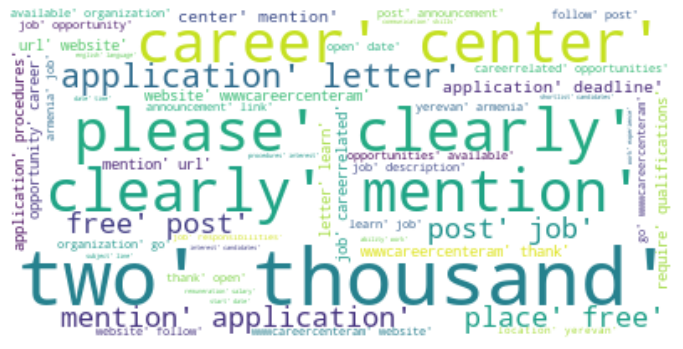

In [46]:
## Word Cloud for jobpost
from wordcloud import WordCloud

L1=' '.join(df['jobpost'].astype('str'))

wordcloud = WordCloud(max_words=50,stopwords=[],max_font_size=60,background_color='white').generate(L1)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

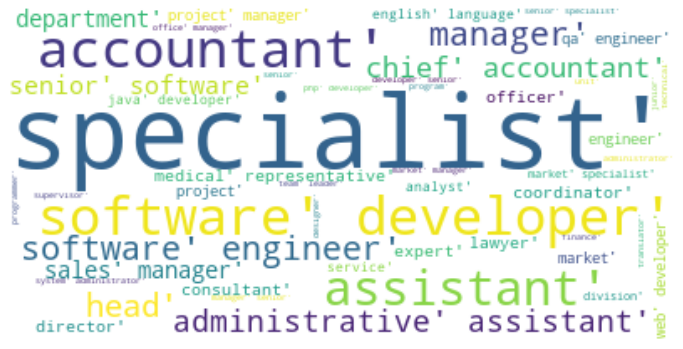

In [47]:
## Word Cloud for Title
from wordcloud import WordCloud

L2=' '.join(df['Title'].astype('str'))

wordcloud = WordCloud(max_words=50,stopwords=[],max_font_size=60,background_color='white').generate(L2)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

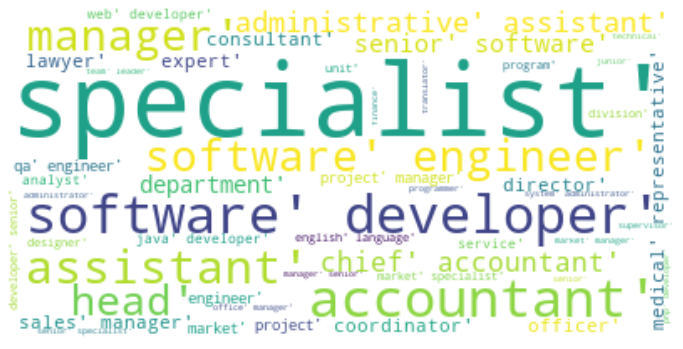

In [48]:
## Word Cloud for Company
from wordcloud import WordCloud

L3=' '.join(df['Company'].astype('str'))

wordcloud = WordCloud(max_words=50,stopwords=[],max_font_size=60,background_color='white').generate(L3)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

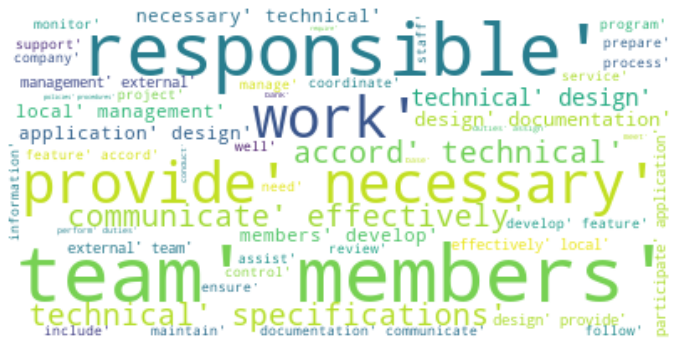

In [49]:
## Word Cloud for JobRequirment
from wordcloud import WordCloud

L4=' '.join(df['JobRequirment'].astype('str'))

wordcloud = WordCloud(max_words=50,stopwords=[],max_font_size=60,background_color='white').generate(L4)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

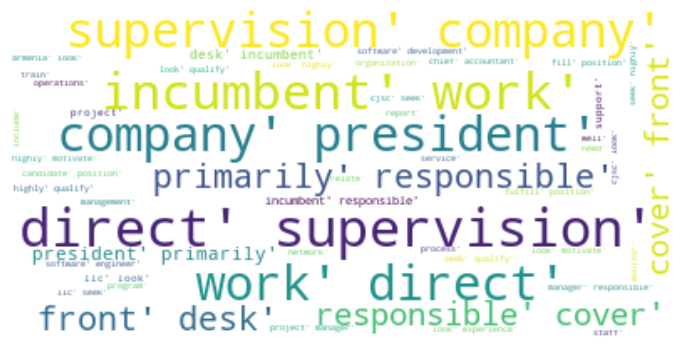

In [50]:
## Word Cloud for JobDescription
from wordcloud import WordCloud

L5=' '.join(df['JobDescription'].astype('str'))

wordcloud = WordCloud(max_words=50,stopwords=[],max_font_size=60,background_color='white').generate(L5)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

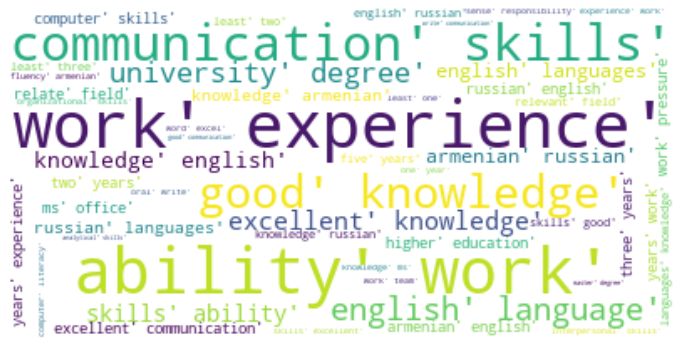

In [51]:
## Word Cloud for RequiredQual
from wordcloud import WordCloud

L6=' '.join(df['RequiredQual'].astype('str'))

wordcloud = WordCloud(max_words=50,stopwords=[],max_font_size=60,background_color='white').generate(L6)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### Most Popular Kewords- Jobpost Columns.

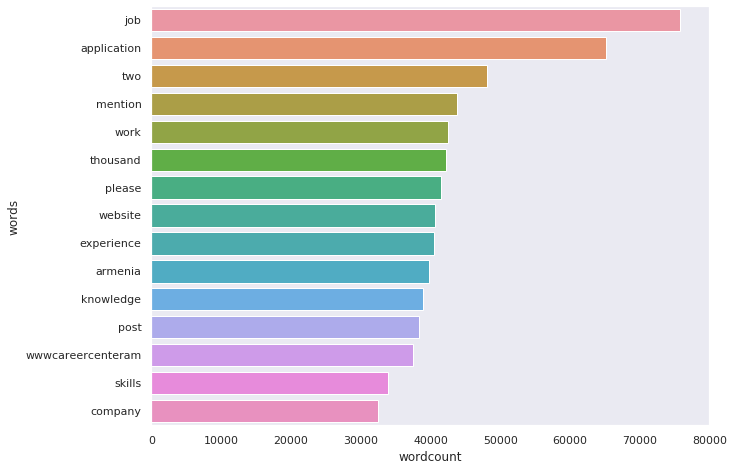

In [52]:
# Creating the Bag of Words model 
word_count = {}

for data in df['jobpost']: 
    
    for word in data:
        
        if word not in word_count.keys(): 
            word_count[word] = 1
            
        else: 
            word_count[word] += 1            
            
# converting word2count dictionary to DataFrame

word_count_df = pd.DataFrame(word_count.items(), columns = ['words', 'wordcount'])
word_count_df = word_count_df.sort_values('wordcount', ascending = False).reset_index(drop = True)
freq_words = word_count_df.head(15)

sns.barplot(x = 'wordcount', y = 'words', data = freq_words)

##### Most Popular Kewords- Title Columns.

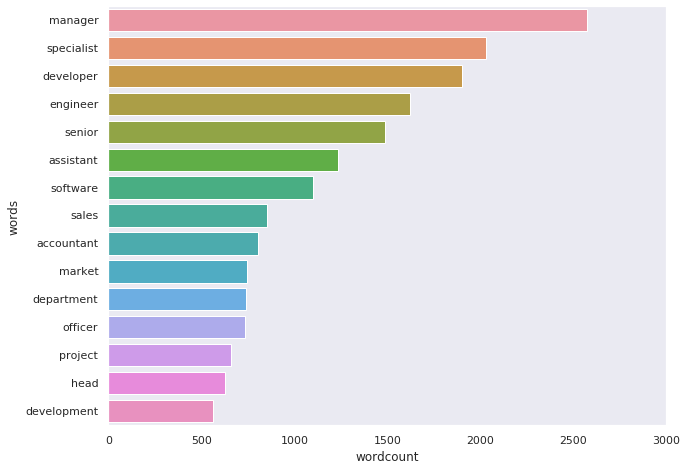

In [53]:
# Creating the Bag of Words model 
word_count = {}

for data in df['Title']: 
    
    for word in data:
        
        if word not in word_count.keys(): 
            word_count[word] = 1
            
        else: 
            word_count[word] += 1            
            
# converting word2count dictionary to DataFrame

word_count_df = pd.DataFrame(word_count.items(), columns = ['words', 'wordcount'])
word_count_df = word_count_df.sort_values('wordcount', ascending = False).reset_index(drop = True)
freq_words = word_count_df.head(15)

sns.barplot(x = 'wordcount', y = 'words', data = freq_words)

##### Most Popular Kewords- JobRequirment Columns

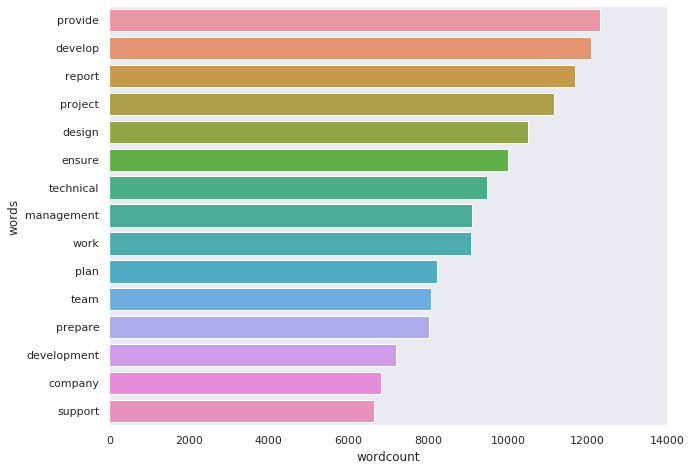

In [54]:
# Creating the Bag of Words model 
word_count = {}

for data in df['JobRequirment']: 
    
    for word in data:
        
        if word not in word_count.keys(): 
            word_count[word] = 1
            
        else: 
            word_count[word] += 1            
            
# converting word2count dictionary to DataFrame

word_count_df = pd.DataFrame(word_count.items(), columns = ['words', 'wordcount'])
word_count_df = word_count_df.sort_values('wordcount', ascending = False).reset_index(drop = True)
freq_words = word_count_df.head(15)

sns.barplot(x = 'wordcount', y = 'words', data = freq_words)

#### Most Popular Kewords- Company Columns

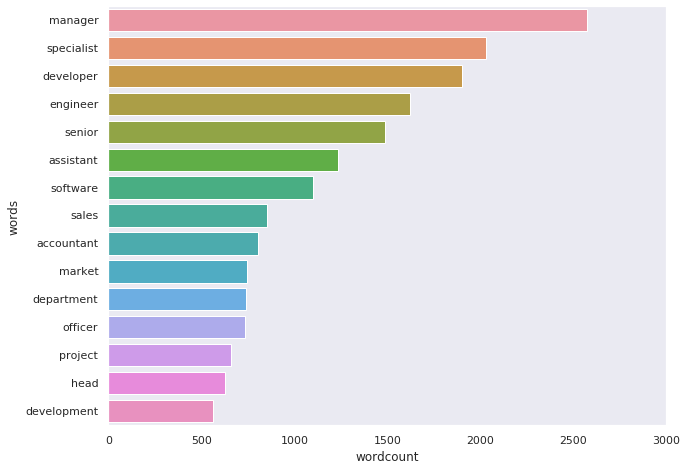

In [55]:
# Creating the Bag of Words model 
word_count = {}

for data in df['Company']: 
    
    for word in data:
        
        if word not in word_count.keys(): 
            word_count[word] = 1
            
        else: 
            word_count[word] += 1            
            
# converting word2count dictionary to DataFrame

word_count_df = pd.DataFrame(word_count.items(), columns = ['words', 'wordcount'])
word_count_df = word_count_df.sort_values('wordcount', ascending = False).reset_index(drop = True)
freq_words = word_count_df.head(15)

sns.barplot(x = 'wordcount', y = 'words', data = freq_words)

##### Most Popular Kewords- JobDescription Columns

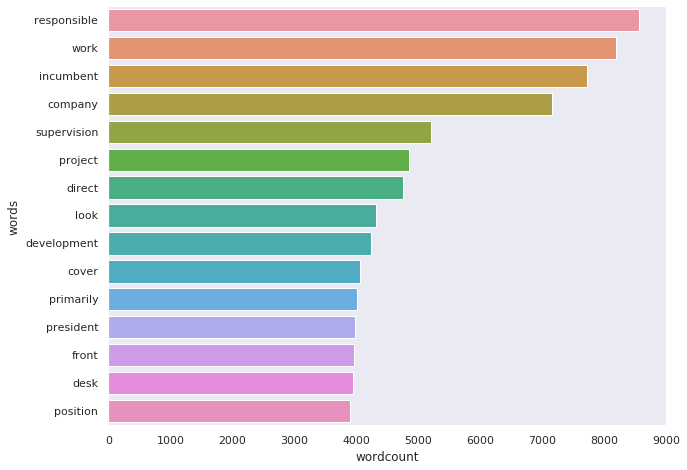

In [56]:
# Creating the Bag of Words model 
word_count = {}

for data in df['JobDescription']: 
    
    for word in data:
        
        if word not in word_count.keys(): 
            word_count[word] = 1
            
        else: 
            word_count[word] += 1            
            
# converting word2count dictionary to DataFrame

word_count_df = pd.DataFrame(word_count.items(), columns = ['words', 'wordcount'])
word_count_df = word_count_df.sort_values('wordcount', ascending = False).reset_index(drop = True)
freq_words = word_count_df.head(15)

sns.barplot(x = 'wordcount', y = 'words', data = freq_words)

##### Most Popular Kewords- RequiredQual Columns

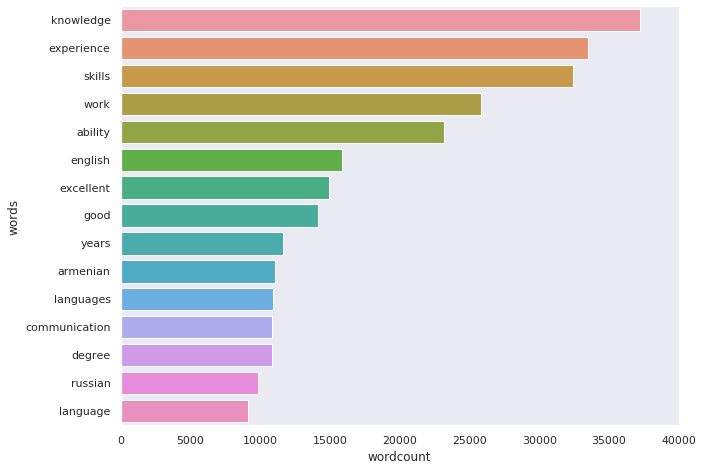

In [57]:
# Creating the Bag of Words model 
word_count = {}

for data in df['RequiredQual']: 
    
    for word in data:
        
        if word not in word_count.keys(): 
            word_count[word] = 1
            
        else: 
            word_count[word] += 1            
            
# converting word2count dictionary to DataFrame

word_count_df = pd.DataFrame(word_count.items(), columns = ['words', 'wordcount'])
word_count_df = word_count_df.sort_values('wordcount', ascending = False).reset_index(drop = True)
freq_words = word_count_df.head(15)

sns.barplot(x = 'wordcount', y = 'words', data = freq_words)

#### <a>TEXT MINING

> ### <a>CLASSIFICATION

In [0]:
df['IT'] = df['IT'].astype('int64')

In [59]:
ax=df['IT'].reset_index().groupby('IT').count().reset_index()
ax

,IT,index
0,0,15148
1,1,3748


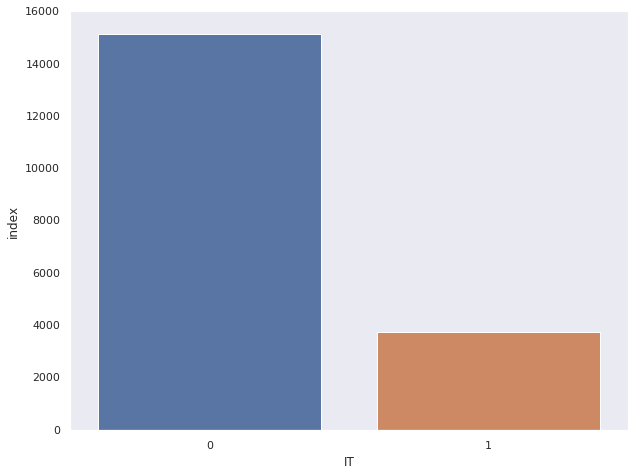

In [60]:
sns.barplot(x=ax['IT'],y=ax['index'])

In [61]:
df.IT.unique()

array([0, 1])

In [62]:
df.columns

Index(['jobpost', 'Title', 'Company', 'JobRequirment', 'JobDescription',
       'RequiredQual', 'IT', 'Year'],
      dtype='object')

In [0]:
df['jobpost'] = [" ".join(review) for review in df['jobpost'].values]

##### <a>CREATING TF-IDF MODEL

In [0]:
## TF-IDF scheme from scratch in Python
# The term TF stands for "term frequency" while the term IDF stands for the "inverse document frequency".
# TF = (Frequency of the word in the sentence) / (Total number of words in the sentence)
# IDF: (Total number of sentences (documents))/(Number of sentences (documents) containing the word)

In [0]:
# vectorizer = TfidfVectorizer()
# vectors = vectorizer.fit_transform([documentA, documentB])
# feature_names = vectorizer.get_feature_names()
# dense = vectors.todense()
# denselist = dense.tolist()
# df = pd.DataFrame(denselist, columns=feature_names)

In [0]:
# Creating the Tf-Idf model

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 2200, min_df = 0.05, max_df = 0.95)

X = vectorizer.fit_transform(df['jobpost']).toarray()

In [67]:
X

array([[0.        , 0.        , 0.04179208, ..., 0.        , 0.01465958,
        0.00976782],
       [0.        , 0.        , 0.03733512, ..., 0.        , 0.        ,
        0.1570701 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04582046,
        0.03053059],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0434934 , 0.05018786,
        0.03344064],
       [0.        , 0.        , 0.        , ..., 0.08462578, 0.        ,
        0.06506597],
       [0.        , 0.        , 0.14391842, ..., 0.05249887, 0.        ,
        0.04036465]])

In [68]:
X.shape

(18896, 564)

##### <a> SVM(Support Vector Machine)

In [0]:
##A support vector machine (SVM) is a type of supervised machine learning classification algorithm.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df.IT, test_size = 0.25, random_state = 42)

In [70]:
from sklearn.svm import SVC

svclassifier = SVC(gamma = 'scale')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
pred_y = svclassifier.predict(X_test)  

In [72]:
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_test, pred_y)##Confusion matrix
accuracy  = sum(cm.diagonal())/cm.sum()
accuracy  ###Accuracy of the model

0.9483488569009314

In [73]:
print(confusion_matrix(y_test,pred_y))  ##Confusion matrix
print(classification_report(y_test,pred_y)) ##Classification matrix

[[3747   69]
 [ 175  733]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3816
           1       0.91      0.81      0.86       908

    accuracy                           0.95      4724
   macro avg       0.93      0.89      0.91      4724
weighted avg       0.95      0.95      0.95      4724



#### <a>PREDICTION

In [74]:
pred_y

array([0, 0, 0, ..., 1, 0, 0])

#### Jobs related- 

##  <a>UNSUPERVISED LEARNING

In [0]:
# Data Selection
diff = df[['RequiredQual']]

In [76]:

diff['RequiredQual'] = diff['RequiredQual'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### <a>Kmeans Clustering

In [0]:
from nltk.util import ngrams

In [78]:
def remove_punctuations(text):
    text=re.sub(r'!"#$%&()*,-./:;<=>?@\[]^_`{|}~','', text)                # Remove punctuations
    text=text.lower()                                                      # Convert text to lower
    return(text)

diff['RequiredQual']=diff['RequiredQual'].apply( lambda x: remove_punctuations(x))
diff['RequiredQual'].head(4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    ['perform', 'job', 'successfully', 'individual...
1    ['bachelor', 'degree', 'master', 'prefer', 'ex...
2    ['degree', 'environmentally', 'relate', 'field...
3    ['advance', 'degree', 'public', 'health', 'soc...
Name: RequiredQual, dtype: object

In [79]:
#tokenize text with Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.1, max_df=0.9,
                             ngram_range=(1, 4), 
                             stop_words='english')
vectorizer.fit(diff['RequiredQual'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=0.1, ngram_range=(1, 4), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
X_train = vectorizer.transform(diff['RequiredQual'])
voc = vectorizer.get_feature_names()

In [81]:
voc

['ability',
 'ability work',
 'ability work pressure',
 'account',
 'advance',
 'analytical',
 'armenian',
 'armenian english',
 'armenian russian',
 'armenian russian english',
 'armenian russian english languages',
 'armenian russian languages',
 'bank',
 'basic',
 'business',
 'communication',
 'communication skills',
 'computer',
 'computer skills',
 'degree',
 'design',
 'development',
 'economics',
 'education',
 'english',
 'english language',
 'english languages',
 'english russian',
 'environment',
 'excel',
 'excellent',
 'excellent communication',
 'excellent communication skills',
 'excellent knowledge',
 'experience',
 'field',
 'finance',
 'fluency',
 'good',
 'good knowledge',
 'high',
 'higher',
 'higher education',
 'include',
 'international',
 'internet',
 'interpersonal',
 'knowledge',
 'knowledge armenian',
 'knowledge english',
 'knowledge english language',
 'knowledge russian',
 'language',
 'languages',
 'languages knowledge',
 'learn',
 'level',
 'management',

In [0]:
# # get the tf-idf table 
# vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
#                              ngram_range=(1, 2), 
#                              stop_words='english')
# vectorizer.fit(diff['RequiredQual'])

In [0]:
# # Create a training data
# X_train = vectorizer.transform(diff['RequiredQual'])

In [0]:
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [0]:
# Use SVD to reduce dimensions
TR_svd = TruncatedSVD(100)
normal= Normalizer(copy=False)
Ma_pip = make_pipeline(TR_svd, normal)
X_Ma_pip = Ma_pip.fit_transform(X_train)

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score,pairwise_distances

In [86]:
explained_variance = TR_svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 99%


In [0]:
range_n_clusters = list (range(2,15))

In [88]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_Ma_pip)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_Ma_pip, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.045519584354551584
For n_clusters = 3, silhouette score is 0.03931586537369379
For n_clusters = 4, silhouette score is 0.04874467394823663
For n_clusters = 5, silhouette score is 0.0529901797249581
For n_clusters = 6, silhouette score is 0.06025098363980774
For n_clusters = 7, silhouette score is 0.061674421571080745
For n_clusters = 8, silhouette score is 0.0623023944018095
For n_clusters = 9, silhouette score is 0.06399435813330712
For n_clusters = 10, silhouette score is 0.06611413714008725
For n_clusters = 11, silhouette score is 0.06820409750602295
For n_clusters = 12, silhouette score is 0.06859337870127012
For n_clusters = 13, silhouette score is 0.07026922543420903
For n_clusters = 14, silhouette score is 0.07110040072769136


In [0]:
# we create a kmeans model
model = KMeans(n_clusters=14, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=42)

In [90]:
# apply the model on this prepared data
res = model.fit(X_train)
res

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=14, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
# Getting the vocalbulary as well as cluster centers
# Firstly, set of words from the tf-idf itself
vocab = vectorizer.get_feature_names()
vocab = np.array(vocab)

In [0]:
# Then, the cluster centers from the model fit that we stored on res
cluster_centers = np.array(res.cluster_centers_)

In [93]:
x=np.array((0.1,10,0.05,1.5,2,5))
print(x)
print(x.argsort())
res.cluster_centers_[0].argsort()

[ 0.1  10.    0.05  1.5   2.    5.  ]
[2 0 3 4 5 1]


array([ 10,   2,   9,  96,  83,  50,  58,  79,  42,  55,   3,  68,  54,
        13,  11,  84,  76,  78,  41,  49,  87,  48,  32,  64,   8, 102,
        33, 101,  80,  27,  51,  60,  28,  82,  20,  39,  31,  12,  40,
         1,  98,  18,  45,  63,  23,  65,   5,  46,  36,  62,  26,  85,
        89,  88,  29,  59,  93,  25,  77,  67,  16,  22,   7,  61,  43,
         4,  90,  56,  66,  17,  70,  38,  53,  95,  86,  15,  75,  52,
       100,  73,   6,  14,  21,  37,  30,  24,   0,  97,  69,  92,  72,
        91,  47,  74,  99,  94,  44,  35,  19,  81,  71,  57,  34])

In [0]:
# sorting the cluster centers
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

In [95]:
# get top 10 words from that cluster
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
    print(words)

{'work', 'skills', 'project', 'management', 'years', 'degree', 'experience', 'relevant', 'field', 'international'}
{'good', 'work', 'skills', 'project', 'management', 'years', 'excellent', 'russian', 'english russian', 'degree', 'languages', 'experience', 'knowledge', 'armenian', 'excellent knowledge', 'relevant', 'field', 'international', 'russian languages'}
{'project', 'software', 'years', 'excellent', 'plus', 'degree', 'languages', 'armenian', 'excellent knowledge', 'field', 'international', 'understand', 'good', 'work', 'skills', 'management', 'russian', 'english russian', 'years experience', 'experience', 'knowledge', 'development', 'ability', 'relevant', 'russian languages'}
{'communication skills', 'project', 'software', 'learn', 'years', 'task', 'excellent', 'plus', 'excellent communication skills', 'degree', 'languages', 'skills good', 'armenian', 'languages knowledge', 'communication', 'excellent knowledge', 'field', 'international', 'understand', 'good', 'work', 'skills', '

In [0]:
words=list(words)

In [0]:
#add top words to train set
train_set=X_train[:,[np.argwhere(vocab==i)[0][0] for i in words]]

In [98]:
diff.head()

,RequiredQual
0,"['perform', 'job', 'successfully', 'individual..."
1,"['bachelor', 'degree', 'master', 'prefer', 'ex..."
2,"['degree', 'environmentally', 'relate', 'field..."
3,"['advance', 'degree', 'public', 'health', 'soc..."
4,"['university', 'degree', 'economical', 'backgr..."


In [99]:
# how many observations are in each cluster

diff['cluster'] = model.labels_
diff.groupby('cluster').count()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RequiredQual
cluster,
0,1810
1,1401
2,1369
3,531
4,2074
5,1877
6,1590
7,1254
8,1442


In [100]:
# what does each cluster look like
diff.head()

,RequiredQual,cluster
0,"['perform', 'job', 'successfully', 'individual...",7
1,"['bachelor', 'degree', 'master', 'prefer', 'ex...",4
2,"['degree', 'environmentally', 'relate', 'field...",0
3,"['advance', 'degree', 'public', 'health', 'soc...",12
4,"['university', 'degree', 'economical', 'backgr...",2


<center> <h1> END